<h1 align ="center">Boston Housing Prices</h1>

<p align ="center"><img src="images/house.jpg" alt="Boston House" width="400" height="400" title="Tip"/></p>

## Machine Learning and Statistics Project 2019
### Roisin Fallon

## Table of Contents

1. [Python Libraries](#lib)
2. [Boston Housing Dataset](#boston)
    * [Keys](#keys)
    * [Feature Names](#feature)
    * [DESC](#desc)
5. [Conclusion](#con)
6. [Bibliography](#bib)

<a name="lib"></a>
## Python Libraries:

<b> Anaconda on your device (version 3.7 +) </b>

 <a href=https://www.anaconda.com/distribution/> Download here </a>

This contains porting for the library listed below. By downloading Anaconda it removes the need to import numerous libraries seperately.
 
 <b> Pandas </b> 
 
 <a href=https://pandas.pydata.org/getpandas.html> Download here </a>
 
This is a Python package designed to strucure information in rows and columns.  It is known for quick and easy data manipulation, aggregation, and visualization.  Python takes in data via a CSV, TSV file or SQL database and creates a Python object called a data frame. Brief Introducton of Panda outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673> here. </a>

<b> NumPy </b> 

<a href=http://www.numpy.org/> Download here </a>

This is a numerical library, performs many mathematical operations and handles i.  Brief introductiion outlined <a href=https://towardsdatascience.com/a-quick-introduction-to-the-numpy-library-6f61b7dee4db> here. </a>

<b> Matplotlib </b> 

<a href=https://matplotlib.org/downloads.htmll> Download here </a>

This is a plotting library, makes  2D plots  that helps in the visualisation of figures using one or multiple numeric variables. It can generate histograms, pie charts, time series, boxplot, violin plot, stack plot, stem plots and scatter plots.  It can be used in Python scripts, Jupyter notebook, and web application servers.  Brief Introduction outlined  <a href=https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70> here. </a>

<b> Seaborn </b>

This a satistical plotting library  which has more advanced data visualisation than matplotlib (both are plotting libraries). Seaborn produces nice visualizations eliminating much of the work necessary for producing similar visualizations with matplotlib. It gives a high-level interface to draw statistical graphs, making it easier to generate more complex visualizations. Brief introduction outlined <a href=https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850> here. </a>

<b> Scikit-learn </b>

Simple and efficient tool that can be used for data miming or data analysis. It's library contains a lot of effiecient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. It comes as part of the anaconda package Brief introduction outlined <a href=https://scikit-learn.org/stable/install.html > here. </a>

In [26]:
# Import the library for generating random variables
import numpy as np

# Import the library for handling data
import pandas as pd

# Visualisation library
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Import libraries for plotting
import matplotlib.pyplot as plt

# Import the libraries for T-test and ANOVA
import scipy.stats as stats

# inport statsmodels.
import statsmodels.api as sm

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# To plot the graph embedded in the notebook
%matplotlib inline

# Standardise the size of the plots throughout this project
plt.rcParams['figure.figsize'] = (12, 10)




# import statsmodels.formula.api as smf
# import scipy.linalg as sl
# import sklearn.linear_model as lm

<a name="boston"></a>
## Boston Housing Dataset 

In [27]:
# Import the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Commented out the print statement here as it is difficult to read and interupt.
# print(boston)  

# Adapted from: https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb

#Values
price = boston.target                                   # Target values
feature = boston.data                                   # Attributes values

# Store in DataFrame
attributes = boston.feature_names                       # Feature names
data = pd.DataFrame(feature, columns = attributes)
target = pd.DataFrame(price, columns =['MEDV'])
df = pd.concat([data, target,], axis = 1)               # concat data/target

<a name="keys"></a>

### Keys 

The Boston dataset is a dictinary which holds keys and values for keys. This gives a quick insight into what the boston housing price dataset contains. Fro this we can see that this dataset not only contains data but contains information about this data. 
https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/

In [28]:
# What fields are in this dictionary

print("Keys in the boston dataset: \n", boston.keys())

Keys in the boston dataset: 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<a name="feature"></a>
### Feature Names

From the shape command we can see that the boston dataset consists fo 506 rows and 13 columns. This command will tell us what each of the 13 columns represent in the dataset. It also indicates that we are missing the MEDV variable which represents the median value of owner-occupied homes in $1000s.

In [29]:
# Determine what each of the columns in the dataset represent

print("\nColumn names of the Boston Dataset represent the following:\n\n", boston.feature_names)   


Column names of the Boston Dataset represent the following:

 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<a name="desc"></a>
### DESCR

This will provide the dataset characteristics for the dataset.

In [30]:
# Describes the dataset

print(boston.DESCR)

print("\n\n**********************************************************************")
print("                            DESC Summary                              ")
print("**********************************************************************")

print("Number of Houses                   : ", data.shape[0])
print("Number of Housing Features         : ", data.shape[1])
print("**********************************************************************\n")

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<a name="head"></a>
### Head  of the dataset

In [31]:
# Default is the first 5 rows 
print("\n Head of the Boston Dataset:")
df.head()


 Head of the Boston Dataset:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<a name="tail"></a>
### Tail of the dataset

In [32]:
# Print the last 5 rows
print("\n Tail of the Boston Dataset: ")
df.tail()


 Tail of the Boston Dataset: 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


<a name="stats"></a>
##  EDA and Statistical Summary

In [33]:
# The following code performs several statistical calculations on the dataset.

# TMinimum price of the data
minimum_price = np.min(price)
# Alternative using pandas
# minimum_price = prices.min()

# Maximum price of the data 
maximum_price = np.max(price)
# Alternative using pandas
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(price)
# Alternative using pandas
# mean_price = prices.mean()

# Median price of the data - 50% i.e. the halfway marker of the dataset
median_price = np.median(price)
# Alternative using pandas
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(price)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(price, 25)
third_quartile = np.percentile(price, 75)     #  75% of the data has values less than this number        
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics * 1000 as the values in the boston dataaset are in the '000s'
print("Statistics for the Boston Housing dataset:\n")
print("Minimum Housing Price          : ${:,.0f}".format(minimum_price*1000))
print("Maximum Housing Price          : ${:,.0f}".format(maximum_price*1000))
print("Mean Housing Price             : ${:,.0f}".format(mean_price*1000))
print("Median Housing Price           : ${:,.0f}".format(median_price*1000))
print("Standard deviation of prices   : ${:,.0f}".format(std_price*1000))
print("First quartile of prices       : ${:,.0f}".format(first_quartile*1000))
print("Second quartile of prices      : ${:,.0f}".format(third_quartile*1000))
print("Interquartile (IQR) of prices  : ${:,.0f}".format(inter_quartile*1000))

Statistics for the Boston Housing dataset:

Minimum Housing Price          : $5,000
Maximum Housing Price          : $50,000
Mean Housing Price             : $22,533
Median Housing Price           : $21,200
Standard deviation of prices   : $9,188
First quartile of prices       : $17,025
Second quartile of prices      : $25,000
Interquartile (IQR) of prices  : $7,975


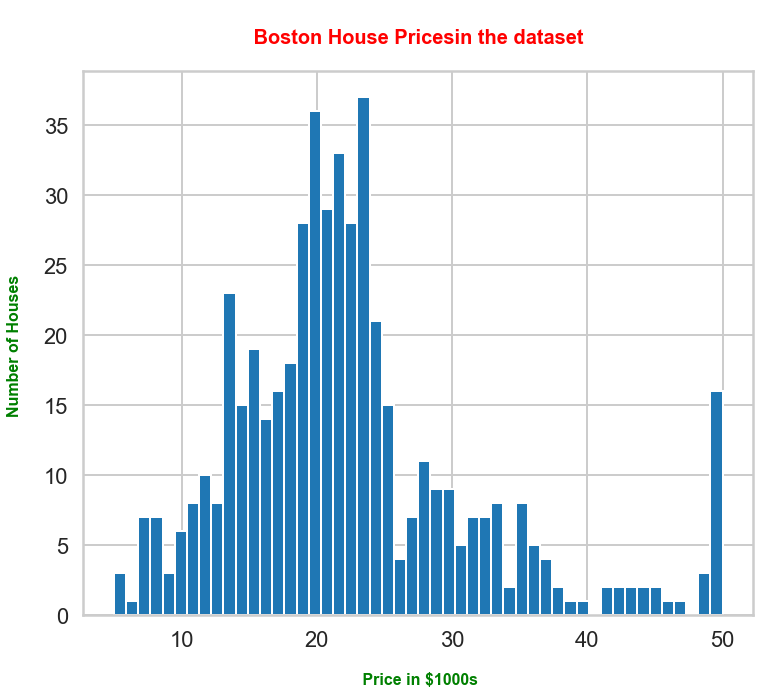

In [51]:
# Quick Visualisation of the house price in the dataset

plt.hist(boston.target,bins=50) 
plt.xlabel("\n Price in $1000s", fontweight="bold", fontsize="16", color="g")                                         # Label of the x-axis
plt.ylabel("Number of Houses \n", fontweight="bold", fontsize="16", color="g")                                                # Label of the y-axis
plt.title("\n Boston House Pricesin the dataset \n", fontweight="bold", fontsize="20", color="r")                           # Label title of distplot
plt.show()

In [34]:
print("\n Statistical Summary of the Boston Housing Dataset: \n")
df.describe(include='all').T.round(2)


 Statistical Summary of the Boston Housing Dataset: 



,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


<a name="info"></a>
### Info 

Provides information on the Boston dataset including names of columns, total number of rows and columns, data type of each column, range index and memory usage.

In [35]:
print("Information on the Boston Housing Dataset: \n")
df.info()

Information on the Boston Housing Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


<a name="clean"></a>
## Cleaning of the data

It is important to understand that NaN or missing values can take a number of different forms e.g. 0 or  written as "missing". It can be noted when we ran the head and tail of the dataset there are a number of 0's for ZN and CHAS. Thus, we can replace the 0's with NaN to calculate how much data we are missing. [1]

In [36]:
# Copy the dataset for the Descriptive and Interference section
df1 = df.copy(deep=True)

In [37]:
# Adapted from: https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c

df1.ZN.replace(0, np.nan, inplace = True)
df1.CHAS.replace(0, np.nan, inplace = True)

In [38]:
# Rerun the .info() method to determine the details of the missing values in the dataset following the replacement of the 0 values with NaN
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         134 non-null float64
INDUS      506 non-null float64
CHAS       35 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


#### Calculate the percent of missing values
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Generally, if there is 20–25% missing values we can impute them with different ways like mean or median. But if it’s more than that, it’s better to remove those features otherwise they can affect our result. As we can see below both “ZN” and “CHAS” are missing more than 70% data, so we will remove both these features. [1]

In [39]:
df1.isnull().sum() / len(data) * 100

CRIM        0.000000
ZN         73.517787
INDUS       0.000000
CHAS       93.083004
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.000000
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000
B           0.000000
LSTAT       0.000000
MEDV        0.000000
dtype: float64

#### Dropping the columns 

In [40]:
df1 = df1.drop(['ZN', 'CHAS'], axis = 1)

In [41]:
# Here we
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CRIM       506 non-null float64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12)
memory usage: 47.5 KB


In [ ]:
target = 

## Correlation

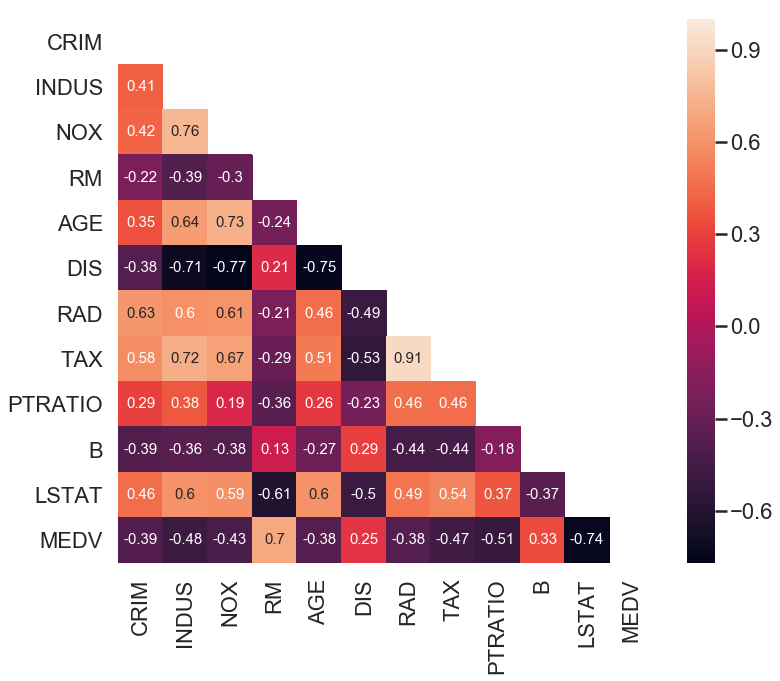

In [42]:
# Adapted from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = df1.corr()

# Create a mask for the upper left triangular portion 
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap features
sns.heatmap(corr, mask=mask, annot = True, annot_kws={"size": 15})

## Inferential Statistics

# Section 3: 

There are 13 features. Here we will remove the columns that will not be used to predict the target variable.

* 16 data points have an 'MEDV' value of 50.0. These data points likely contain missing or censored values and have been removed.
* 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.

<a name="con"></a>
## Conclusion

<a name="bib"></a>
## Bibliography

### Code Adapted from the following

1. https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
2. https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c
3. https://seaborn.pydata.org/examples/many_pairwise_correlations.html

### Code for text
1. https://medium.com/swlh/implementation-of-linear-regression-9fd58cb4656c